## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Бирюков |
|---------|--------|
| Группа  | 7      |

**Вариант:** 2. Tensorflow/Keras

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

def plot(model, h, test):
    pred = model.predict(test.batch(128))
    labels = np.concatenate([y for x, y in test.batch(1000)], axis=0)
    conf_matrix = tf.math.confusion_matrix(labels, pred.argmax(axis=1))
    
    figure = plt.figure(figsize=(15, 4))
    axes = figure.add_subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    matr = axes.imshow(conf_matrix)
    figure.colorbar(matr)
    axes = figure.add_subplot(1, 2, 2)
    plt.xticks(range(1, len(h.history['accuracy'])+1))
    plt.plot(h.history['accuracy'], 'k--')
    plt.plot(h.history['val_accuracy'], 'g-')
    plt.show()

## MNIST

In [ ]:
(mnist_train, mnist_test), mnist_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [ ]:
mnist_train = mnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(mnist_info.splits['train'].num_examples)

mnist_test = mnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

### Однослойный персептрон

Epoch 1/10
938/938 - 2s - loss: 1.0059 - accuracy: 0.7698 - val_loss: 0.6102 - val_accuracy: 0.8621 - 2s/epoch - 2ms/step
Epoch 2/10
938/938 - 2s - loss: 0.5576 - accuracy: 0.8637 - val_loss: 0.4817 - val_accuracy: 0.8814 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.4759 - accuracy: 0.8773 - val_loss: 0.4305 - val_accuracy: 0.8892 - 2s/epoch - 2ms/step
Epoch 4/10
938/938 - 2s - loss: 0.4360 - accuracy: 0.8850 - val_loss: 0.4015 - val_accuracy: 0.8961 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.4115 - accuracy: 0.8898 - val_loss: 0.3821 - val_accuracy: 0.8997 - 2s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.3942 - accuracy: 0.8933 - val_loss: 0.3681 - val_accuracy: 0.9014 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.3813 - accuracy: 0.8959 - val_loss: 0.3577 - val_accuracy: 0.9038 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.3713 - accuracy: 0.8982 - val_loss: 0.3496 - val_accuracy: 0.9049 - 2s/epoch - 2ms/step
Epoch 9/10
938/938 - 2s 

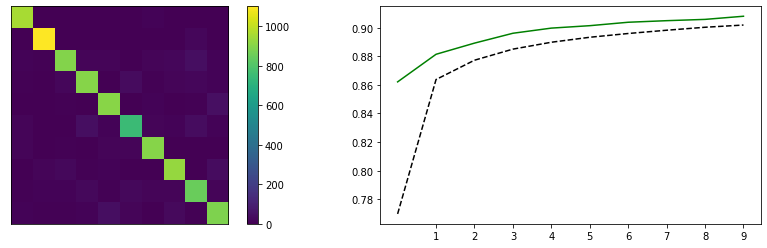

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('sgd', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

Adam показывает лучший результат. 93% по всей видимости является пределом для однослойной модели

Epoch 1/10
938/938 - 2s - loss: 0.5544 - accuracy: 0.8600 - val_loss: 0.3349 - val_accuracy: 0.9105 - 2s/epoch - 2ms/step
Epoch 2/10
938/938 - 2s - loss: 0.3245 - accuracy: 0.9106 - val_loss: 0.2929 - val_accuracy: 0.9197 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.2958 - accuracy: 0.9176 - val_loss: 0.2831 - val_accuracy: 0.9203 - 2s/epoch - 2ms/step
Epoch 4/10
938/938 - 2s - loss: 0.2825 - accuracy: 0.9211 - val_loss: 0.2740 - val_accuracy: 0.9228 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.2742 - accuracy: 0.9233 - val_loss: 0.2697 - val_accuracy: 0.9250 - 2s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.2682 - accuracy: 0.9258 - val_loss: 0.2655 - val_accuracy: 0.9265 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.2642 - accuracy: 0.9267 - val_loss: 0.2677 - val_accuracy: 0.9263 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.2605 - accuracy: 0.9279 - val_loss: 0.2671 - val_accuracy: 0.9265 - 2s/epoch - 2ms/step
Epoch 9/10
938/938 - 2s 

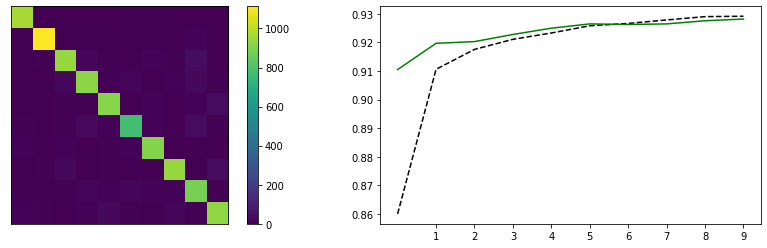

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

### Многослойный персептрон

Двухслойный персептрон достигает точности 97-98%. Такого результата можно добиться несколькими способами

Epoch 1/10
469/469 - 2s - loss: 0.3101 - accuracy: 0.9079 - val_loss: 0.1589 - val_accuracy: 0.9496 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1348 - accuracy: 0.9608 - val_loss: 0.1113 - val_accuracy: 0.9669 - 2s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0961 - accuracy: 0.9713 - val_loss: 0.0954 - val_accuracy: 0.9718 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.0762 - accuracy: 0.9778 - val_loss: 0.0856 - val_accuracy: 0.9721 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0616 - accuracy: 0.9816 - val_loss: 0.0846 - val_accuracy: 0.9728 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0767 - val_accuracy: 0.9762 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0726 - val_accuracy: 0.9773 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0740 - val_accuracy: 0.9779 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 2s 

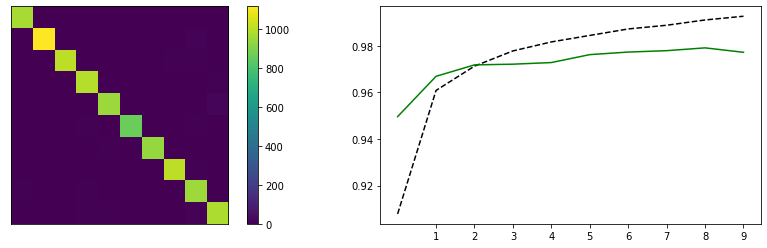

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.05, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 2s - loss: 0.4560 - accuracy: 0.8791 - val_loss: 0.2446 - val_accuracy: 0.9301 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2177 - accuracy: 0.9390 - val_loss: 0.1868 - val_accuracy: 0.9468 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1675 - accuracy: 0.9527 - val_loss: 0.1514 - val_accuracy: 0.9568 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1366 - accuracy: 0.9617 - val_loss: 0.1334 - val_accuracy: 0.9615 - 2s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.1148 - accuracy: 0.9681 - val_loss: 0.1175 - val_accuracy: 0.9648 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0987 - accuracy: 0.9724 - val_loss: 0.1043 - val_accuracy: 0.9696 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0851 - accuracy: 0.9766 - val_loss: 0.1000 - val_accuracy: 0.9703 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0753 - accuracy: 0.9788 - val_loss: 0.0940 - val_accuracy: 0.9723 - 2s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s 

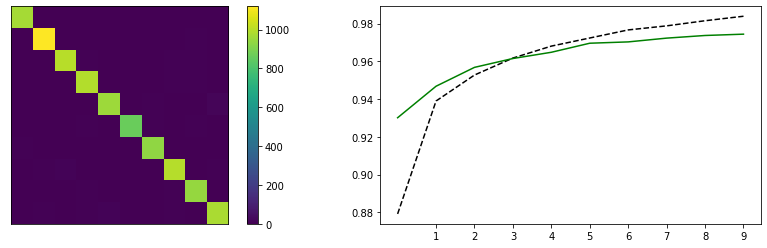

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 2s - loss: 0.5258 - accuracy: 0.8749 - val_loss: 0.2775 - val_accuracy: 0.9238 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 0.2510 - accuracy: 0.9279 - val_loss: 0.2194 - val_accuracy: 0.9361 - 2s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1995 - accuracy: 0.9428 - val_loss: 0.1849 - val_accuracy: 0.9448 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1666 - accuracy: 0.9524 - val_loss: 0.1546 - val_accuracy: 0.9540 - 2s/epoch - 3ms/step
Epoch 5/10
469/469 - 2s - loss: 0.1427 - accuracy: 0.9589 - val_loss: 0.1404 - val_accuracy: 0.9580 - 2s/epoch - 3ms/step
Epoch 6/10
469/469 - 2s - loss: 0.1242 - accuracy: 0.9640 - val_loss: 0.1268 - val_accuracy: 0.9617 - 2s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.1099 - accuracy: 0.9686 - val_loss: 0.1169 - val_accuracy: 0.9647 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0981 - accuracy: 0.9716 - val_loss: 0.1067 - val_accuracy: 0.9672 - 2s/epoch - 3ms/step
Epoch 9/10
469/469 - 2s 

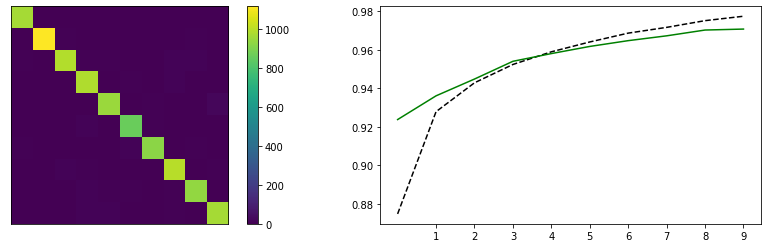

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('rmsprop', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Увеличение числа слоев не дает значительного прироста точности.

Epoch 1/10
469/469 - 3s - loss: 0.2986 - accuracy: 0.9115 - val_loss: 0.1614 - val_accuracy: 0.9521 - 3s/epoch - 6ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1393 - accuracy: 0.9574 - val_loss: 0.1087 - val_accuracy: 0.9655 - 2s/epoch - 5ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.0901 - val_accuracy: 0.9719 - 2s/epoch - 5ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0698 - accuracy: 0.9778 - val_loss: 0.0885 - val_accuracy: 0.9736 - 2s/epoch - 5ms/step
Epoch 5/10
469/469 - 2s - loss: 0.0542 - accuracy: 0.9823 - val_loss: 0.0804 - val_accuracy: 0.9750 - 2s/epoch - 5ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0696 - val_accuracy: 0.9773 - 2s/epoch - 5ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0780 - val_accuracy: 0.9771 - 2s/epoch - 5ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0712 - val_accuracy: 0.9787 - 2s/epoch - 5ms/step
Epoch 9/10
469/469 - 2s 

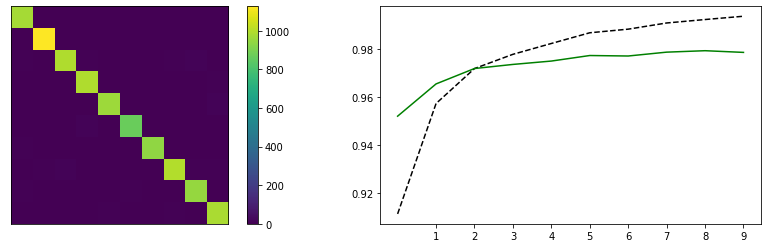

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 3s - loss: 0.4240 - accuracy: 0.8833 - val_loss: 0.2318 - val_accuracy: 0.9320 - 3s/epoch - 6ms/step
Epoch 2/10
469/469 - 2s - loss: 0.2052 - accuracy: 0.9406 - val_loss: 0.1797 - val_accuracy: 0.9452 - 2s/epoch - 5ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1542 - accuracy: 0.9564 - val_loss: 0.1465 - val_accuracy: 0.9562 - 2s/epoch - 5ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1254 - accuracy: 0.9637 - val_loss: 0.1150 - val_accuracy: 0.9650 - 2s/epoch - 5ms/step
Epoch 5/10
469/469 - 2s - loss: 0.1047 - accuracy: 0.9702 - val_loss: 0.1073 - val_accuracy: 0.9658 - 2s/epoch - 5ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0901 - accuracy: 0.9747 - val_loss: 0.0977 - val_accuracy: 0.9710 - 2s/epoch - 5ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0783 - accuracy: 0.9778 - val_loss: 0.0936 - val_accuracy: 0.9703 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0690 - accuracy: 0.9803 - val_loss: 0.0822 - val_accuracy: 0.9734 - 2s/epoch - 4ms/step
Epoch 9/10
469/469 - 2s 

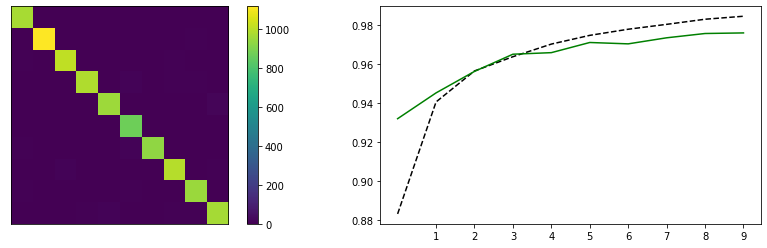

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adagrad(0.03), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

## FashionMNIST

In [ ]:
(fmnist_train, fmnist_test), fmnist_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [ ]:
fmnist_train = fmnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
fmnist_train = fmnist_train.cache()
fmnist_train = fmnist_train.shuffle(fmnist_info.splits['train'].num_examples)

fmnist_test = fmnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

Точность однослойной модели - 84%

Epoch 1/10
469/469 - 1s - loss: 0.7024 - accuracy: 0.7662 - val_loss: 0.5718 - val_accuracy: 0.8118 - 1s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.5182 - accuracy: 0.8281 - val_loss: 0.5243 - val_accuracy: 0.8235 - 1s/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4840 - accuracy: 0.8361 - val_loss: 0.5056 - val_accuracy: 0.8265 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.4658 - accuracy: 0.8432 - val_loss: 0.4875 - val_accuracy: 0.8326 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.4528 - accuracy: 0.8461 - val_loss: 0.4795 - val_accuracy: 0.8328 - 1s/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.4454 - accuracy: 0.8481 - val_loss: 0.4719 - val_accuracy: 0.8378 - 1s/epoch - 2ms/step
Epoch 7/10
469/469 - 1s - loss: 0.4370 - accuracy: 0.8512 - val_loss: 0.4709 - val_accuracy: 0.8382 - 1s/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.4328 - accuracy: 0.8524 - val_loss: 0.4640 - val_accuracy: 0.8379 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s 

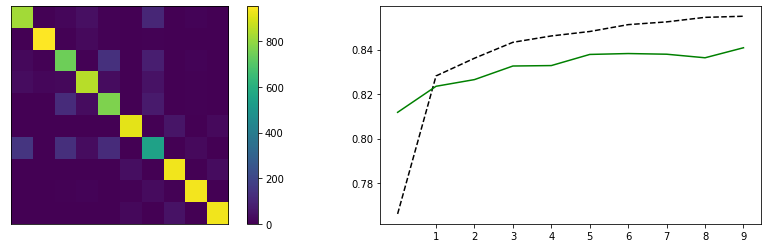

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.01, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

Epoch 1/10
469/469 - 1s - loss: 0.7325 - accuracy: 0.7611 - val_loss: 0.5724 - val_accuracy: 0.8021 - 1s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.5119 - accuracy: 0.8280 - val_loss: 0.5201 - val_accuracy: 0.8199 - 1s/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4728 - accuracy: 0.8407 - val_loss: 0.4948 - val_accuracy: 0.8294 - 1s/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.4509 - accuracy: 0.8481 - val_loss: 0.4774 - val_accuracy: 0.8349 - 1s/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.4372 - accuracy: 0.8517 - val_loss: 0.4667 - val_accuracy: 0.8387 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.4287 - accuracy: 0.8540 - val_loss: 0.4689 - val_accuracy: 0.8376 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 1s - loss: 0.4197 - accuracy: 0.8570 - val_loss: 0.4568 - val_accuracy: 0.8415 - 1s/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.4142 - accuracy: 0.8572 - val_loss: 0.4522 - val_accuracy: 0.8423 - 1s/epoch - 2ms/step
Epoch 9/10
469/469 - 1s 

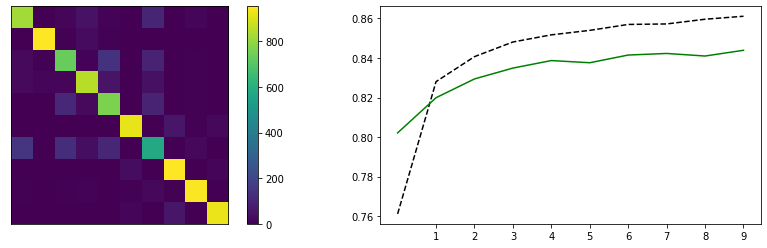

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

Многослойной - 88%

Epoch 1/10
235/235 - 3s - loss: 0.6001 - accuracy: 0.7987 - val_loss: 0.4792 - val_accuracy: 0.8304 - 3s/epoch - 11ms/step
Epoch 2/10
235/235 - 2s - loss: 0.4226 - accuracy: 0.8538 - val_loss: 0.4308 - val_accuracy: 0.8489 - 2s/epoch - 9ms/step
Epoch 3/10
235/235 - 2s - loss: 0.3828 - accuracy: 0.8657 - val_loss: 0.4094 - val_accuracy: 0.8557 - 2s/epoch - 9ms/step
Epoch 4/10
235/235 - 2s - loss: 0.3563 - accuracy: 0.8750 - val_loss: 0.4108 - val_accuracy: 0.8547 - 2s/epoch - 9ms/step
Epoch 5/10
235/235 - 2s - loss: 0.3358 - accuracy: 0.8821 - val_loss: 0.3869 - val_accuracy: 0.8614 - 2s/epoch - 9ms/step
Epoch 6/10
235/235 - 2s - loss: 0.3215 - accuracy: 0.8854 - val_loss: 0.3593 - val_accuracy: 0.8733 - 2s/epoch - 9ms/step
Epoch 7/10
235/235 - 2s - loss: 0.3075 - accuracy: 0.8899 - val_loss: 0.3490 - val_accuracy: 0.8750 - 2s/epoch - 9ms/step
Epoch 8/10
235/235 - 2s - loss: 0.2935 - accuracy: 0.8940 - val_loss: 0.3449 - val_accuracy: 0.8768 - 2s/epoch - 9ms/step
Epoch 9/10
235/235 - 2s

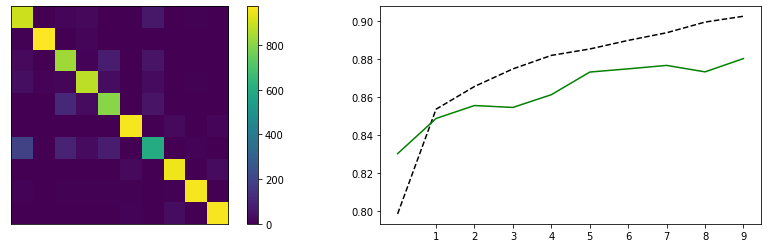

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

Epoch 1/10
235/235 - 3s - loss: 0.6845 - accuracy: 0.7784 - val_loss: 0.4944 - val_accuracy: 0.8287 - 3s/epoch - 13ms/step
Epoch 2/10
235/235 - 3s - loss: 0.4290 - accuracy: 0.8512 - val_loss: 0.4377 - val_accuracy: 0.8425 - 3s/epoch - 11ms/step
Epoch 3/10
235/235 - 2s - loss: 0.3864 - accuracy: 0.8650 - val_loss: 0.4214 - val_accuracy: 0.8484 - 2s/epoch - 10ms/step
Epoch 4/10
235/235 - 2s - loss: 0.3598 - accuracy: 0.8725 - val_loss: 0.3961 - val_accuracy: 0.8588 - 2s/epoch - 11ms/step
Epoch 5/10
235/235 - 2s - loss: 0.3378 - accuracy: 0.8802 - val_loss: 0.3668 - val_accuracy: 0.8692 - 2s/epoch - 11ms/step
Epoch 6/10
235/235 - 2s - loss: 0.3218 - accuracy: 0.8858 - val_loss: 0.3581 - val_accuracy: 0.8703 - 2s/epoch - 11ms/step
Epoch 7/10
235/235 - 3s - loss: 0.3060 - accuracy: 0.8901 - val_loss: 0.3546 - val_accuracy: 0.8745 - 3s/epoch - 11ms/step
Epoch 8/10
235/235 - 2s - loss: 0.2992 - accuracy: 0.8926 - val_loss: 0.3476 - val_accuracy: 0.8749 - 2s/epoch - 11ms/step
Epoch 9/10
235/2

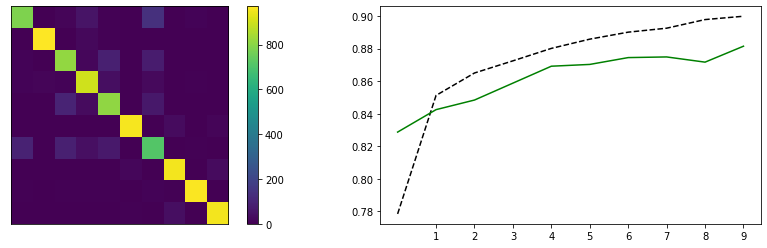

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0002), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

## CIFAR-10

In [3]:
(cifar_train, cifar_test), cifar_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteXV9IQV/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteXV9IQV/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [4]:
cifar_train = cifar_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
cifar_train = cifar_train.cache()
cifar_train = cifar_train.shuffle(cifar_info.splits['train'].num_examples)

cifar_test = cifar_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

CIFAR-10 сложнее для распознавания линейными слоями

Epoch 1/10
391/391 - 19s - loss: 1.8883 - accuracy: 0.3336 - val_loss: 1.7473 - val_accuracy: 0.3843 - 19s/epoch - 50ms/step
Epoch 2/10
391/391 - 5s - loss: 1.7071 - accuracy: 0.3987 - val_loss: 1.6699 - val_accuracy: 0.4158 - 5s/epoch - 13ms/step
Epoch 3/10
391/391 - 5s - loss: 1.6346 - accuracy: 0.4235 - val_loss: 1.6107 - val_accuracy: 0.4382 - 5s/epoch - 13ms/step
Epoch 4/10
391/391 - 5s - loss: 1.5746 - accuracy: 0.4450 - val_loss: 1.5600 - val_accuracy: 0.4469 - 5s/epoch - 13ms/step
Epoch 5/10
391/391 - 5s - loss: 1.5412 - accuracy: 0.4585 - val_loss: 1.5658 - val_accuracy: 0.4480 - 5s/epoch - 13ms/step
Epoch 6/10
391/391 - 5s - loss: 1.5091 - accuracy: 0.4673 - val_loss: 1.5263 - val_accuracy: 0.4628 - 5s/epoch - 13ms/step
Epoch 7/10
391/391 - 5s - loss: 1.4764 - accuracy: 0.4791 - val_loss: 1.5178 - val_accuracy: 0.4648 - 5s/epoch - 13ms/step
Epoch 8/10
391/391 - 5s - loss: 1.4574 - accuracy: 0.4864 - val_loss: 1.5193 - val_accuracy: 0.4603 - 5s/epoch - 13ms/step
Epoch 9/10
391

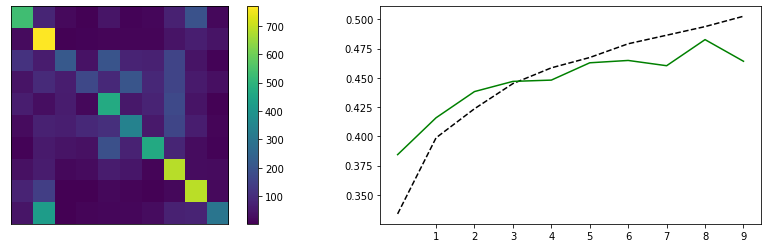

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Несколько помогает увеличение размеров слоев и их количества. Наилучший реультат - 50%

Epoch 1/10
391/391 - 17s - loss: 2.0337 - accuracy: 0.3145 - val_loss: 1.7781 - val_accuracy: 0.3710 - 17s/epoch - 42ms/step
Epoch 2/10
391/391 - 16s - loss: 1.7182 - accuracy: 0.3902 - val_loss: 1.6739 - val_accuracy: 0.4051 - 16s/epoch - 41ms/step
Epoch 3/10
391/391 - 16s - loss: 1.6330 - accuracy: 0.4229 - val_loss: 1.6874 - val_accuracy: 0.4002 - 16s/epoch - 41ms/step
Epoch 4/10
391/391 - 16s - loss: 1.5918 - accuracy: 0.4345 - val_loss: 1.6555 - val_accuracy: 0.4098 - 16s/epoch - 41ms/step
Epoch 5/10
391/391 - 16s - loss: 1.5531 - accuracy: 0.4499 - val_loss: 1.5971 - val_accuracy: 0.4312 - 16s/epoch - 40ms/step
Epoch 6/10
391/391 - 16s - loss: 1.5122 - accuracy: 0.4653 - val_loss: 1.5510 - val_accuracy: 0.4502 - 16s/epoch - 40ms/step
Epoch 7/10
391/391 - 16s - loss: 1.4854 - accuracy: 0.4749 - val_loss: 1.5121 - val_accuracy: 0.4597 - 16s/epoch - 41ms/step
Epoch 8/10
391/391 - 16s - loss: 1.4660 - accuracy: 0.4809 - val_loss: 1.5086 - val_accuracy: 0.4707 - 16s/epoch - 41ms/step


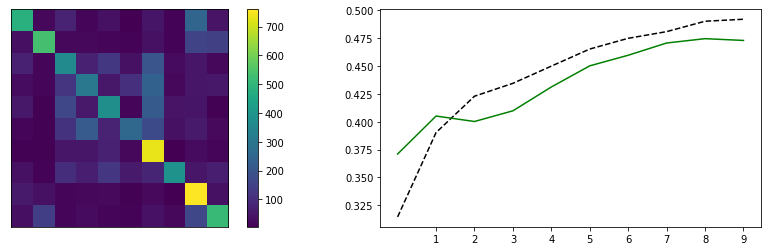

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Epoch 1/10
391/391 - 21s - loss: 1.9506 - accuracy: 0.3147 - val_loss: 1.7119 - val_accuracy: 0.3887 - 21s/epoch - 53ms/step
Epoch 2/10
391/391 - 20s - loss: 1.6704 - accuracy: 0.4017 - val_loss: 1.6404 - val_accuracy: 0.4128 - 20s/epoch - 51ms/step
Epoch 3/10
391/391 - 20s - loss: 1.5969 - accuracy: 0.4298 - val_loss: 1.6080 - val_accuracy: 0.4338 - 20s/epoch - 51ms/step
Epoch 4/10
391/391 - 20s - loss: 1.5296 - accuracy: 0.4557 - val_loss: 1.5421 - val_accuracy: 0.4562 - 20s/epoch - 51ms/step
Epoch 5/10
391/391 - 20s - loss: 1.4795 - accuracy: 0.4728 - val_loss: 1.4821 - val_accuracy: 0.4684 - 20s/epoch - 51ms/step
Epoch 6/10
391/391 - 20s - loss: 1.4408 - accuracy: 0.4853 - val_loss: 1.4823 - val_accuracy: 0.4673 - 20s/epoch - 52ms/step
Epoch 7/10
391/391 - 20s - loss: 1.4139 - accuracy: 0.4970 - val_loss: 1.4461 - val_accuracy: 0.4874 - 20s/epoch - 51ms/step
Epoch 8/10
391/391 - 20s - loss: 1.3755 - accuracy: 0.5106 - val_loss: 1.4293 - val_accuracy: 0.4884 - 20s/epoch - 51ms/step


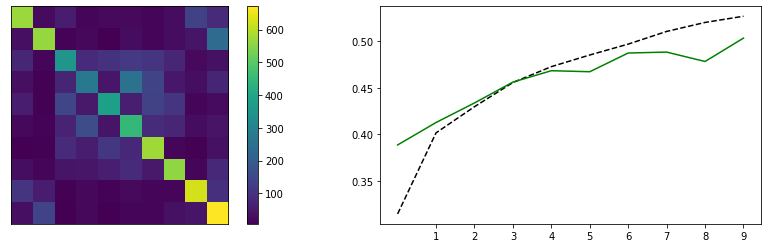

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Epoch 1/10
391/391 - 21s - loss: 1.9047 - accuracy: 0.3146 - val_loss: 1.7403 - val_accuracy: 0.3799 - 21s/epoch - 55ms/step
Epoch 2/10
391/391 - 21s - loss: 1.6880 - accuracy: 0.3931 - val_loss: 1.6039 - val_accuracy: 0.4299 - 21s/epoch - 54ms/step
Epoch 3/10
391/391 - 21s - loss: 1.5876 - accuracy: 0.4307 - val_loss: 1.5900 - val_accuracy: 0.4238 - 21s/epoch - 54ms/step
Epoch 4/10
391/391 - 21s - loss: 1.5194 - accuracy: 0.4576 - val_loss: 1.4999 - val_accuracy: 0.4692 - 21s/epoch - 54ms/step
Epoch 5/10
391/391 - 21s - loss: 1.4770 - accuracy: 0.4728 - val_loss: 1.4742 - val_accuracy: 0.4736 - 21s/epoch - 55ms/step
Epoch 6/10
391/391 - 22s - loss: 1.4355 - accuracy: 0.4896 - val_loss: 1.4709 - val_accuracy: 0.4758 - 22s/epoch - 55ms/step
Epoch 7/10
391/391 - 21s - loss: 1.3983 - accuracy: 0.5009 - val_loss: 1.4586 - val_accuracy: 0.4829 - 21s/epoch - 54ms/step
Epoch 8/10
391/391 - 21s - loss: 1.3626 - accuracy: 0.5120 - val_loss: 1.4348 - val_accuracy: 0.4926 - 21s/epoch - 54ms/step


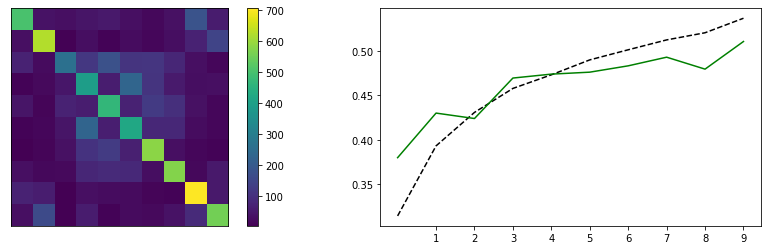

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)